<a href="https://colab.research.google.com/github/Syomara/Data-Science-1/blob/main/Entrega2/ProyectoDS_Parte_2_Bazzini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Visualizaciones en Python
# Primera Entrega

# üìå Resumen

Este proyecto utiliza un dataset denominado Delitos denunciados en Uruguay que proviene del Cat√°logo de Datos Abiertos de Uruguay. El mismo detalla informaci√≥n de todos los delitos denunciados desde Enero 2013 a Abril del 2025, dentro de los datos incluidos en el dataset se encuentran: fecha y lugar del delito, jurisdicci√≥n donde ocurri√≥, motivo aparente y arma utilizada, adem√°s se aclara si el delito lleg√≥ a aclararse o no y, por √∫ltimo, datos personales de la victima.

Durante este proyecto se comenzar√° realizando un an√°lisis de los datos para evaluar si faltan datos en el dataset y se decidir√° que realizar de acuerdo al resultado de esta evaluaci√≥n. Por otro lado se crear√°n visualizaciones simples utilizando herramientas de Phyton como Matplotlib, Pandas y Seaborn, de esta manera se determinar√°n las conclusiones y se responderan preguntas claves para el cumplimiento de los objetivos del proyecto.


El objetivo del proyecto es evaluar en que lugar del Uruguay ocurren la mayor cantidad de delitos, adem√°s de evaluar si existe alg√∫n patr√≥n en las victimas de estos delitos.

# ‚ùìPreguntas / Hip√≥tesis de inter√©s

1.   ¬øEn q√∫e localidad de Uruguay se encuentran la mayor cantidad de delitos denuciados?
2.   ¬øC√≥mo se distribuyen estos delitos a lo largo de los a√±os?
3.   ¬øQu√© g√©nero es m√°s com√∫n en las victimas?
4.   ¬øCu√°n com√∫n es la resoluci√≥n del delito?

# Objetivo del Proyecto
El objetivo de este proyecto es desarrollar un modelo predictivo de la problem√°tica de los delitos en Uruguay generando una base de estudio para estratificar m√°s f√°cilmente donde est√° el problema de delitos y as√≠ generar un pareto que permita resolver el problema m√°s f√°cilmente atacando la mayor cantidad de causas.

# üìä Visualizaciones y An√°lisis


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Syomara/Data-Science-1/main/Entrega2/homicidios_dolosos_consumados(1).csv', encoding='latin-1')
df.head()

ID_VICTIMA       FECHA   A√ëO    MES          TRIMESTRE DIA_SEMANA HORA  \
0  AAA1134816  30.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE    VIERNES    8   
1  AAA1146478  30.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE    VIERNES   13   
2   AAA128234  28.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE  MIERCOLES   22   
3   AAA199424  28.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE  MIERCOLES   20   
4  AAB1152814  16.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE    VIERNES   18   

  DEPARTAMENTO  JURISDICCION                                  LUGAR  ...  \
0    CANELONES  SECCIONAL 28  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   
1   MONTEVIDEO  SECCIONAL 24  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   
2   MONTEVIDEO  SECCIONAL 14  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   
3   TACUAREMBO   SECCIONAL 2                             RESIDENCIA  ...   
4   MONTEVIDEO  SECCIONAL 15  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   

            ARMAREC             PROCESADOS          MENORESCINICIOPROC  \
0     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   
1     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   
2     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   
3  CORTO / PUNZANTE  AUTOR MAYOR FALLECIDO  SIN MENORES C/INICIO PROC.   
4     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   

      ACLARADO    SEXO EDADCALC NACIONALIDAD  \
0  SIN ACLARAR  HOMBRE       39     URUGUAYA   
1  SIN ACLARAR  HOMBRE       33     URUGUAYA   
2  SIN ACLARAR  HOMBRE       31     URUGUAYA   
3     ACLARADO   MUJER       60     URUGUAYA   
4  SIN ACLARAR  HOMBRE       28     URUGUAYA   

                              ANTECEDENTES ANTECEDENTESPORESTUPEFACIENTES  \
0    ANTECEDENTES POR DELITOS NO VIOLENTOS               SIN ANTECEDENTES   
1  ANTECEDENTES POR AMBOS TIPOS DE DELITOS               SIN ANTECEDENTES   
2       ANTECEDENTES POR DELITOS VIOLENTOS               SIN ANTECEDENTES   
3                         SIN ANTECEDENTES               SIN ANTECEDENTES   
4       ANTECEDENTES POR DELITOS VIOLENTOS               SIN ANTECEDENTES   

        REL_VICT_AGRES  
0  VINCULO DESCONOCIDO  
1  VINCULO DESCONOCIDO  
2  VINCULO DESCONOCIDO  
3     PAREJA/EX PAREJA  
4  VINCULO DESCONOCIDO  

[5 rows x 22 columns]

# Items faltantes

In [49]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

En este caso la Base de datos est√° completa por lo que no es necesario eliminar ning√∫n linea.
# An√°lisis Univariado
**Cantidad de Delitos por Departamento**


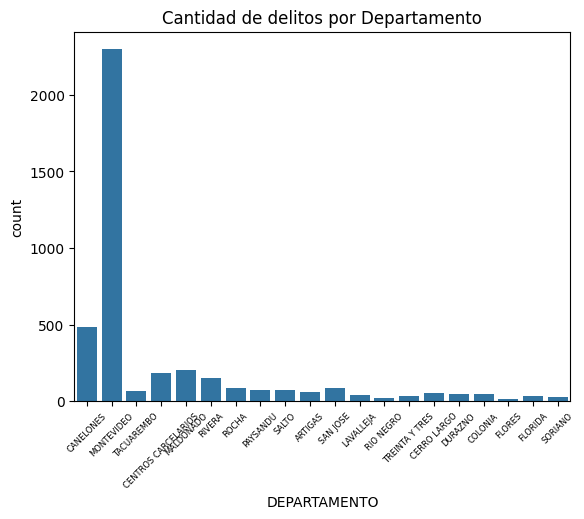

In [50]:
sns.countplot(x='DEPARTAMENTO', data=df)
plt.title('Cantidad de delitos por Departamento')
plt.xticks(fontsize=6,rotation=45)
plt.show()

En este gr√°fico se puede observar f√°cilmente que el Departamento donde m√°s ocurren los delitos son Montevideo y Canelones; considerando que son los Departamentos que m√°s gente tiene, no es raro que se d√© de esta manera.

**Distribuci√≥n de Cantidad de delitos por A√±o**

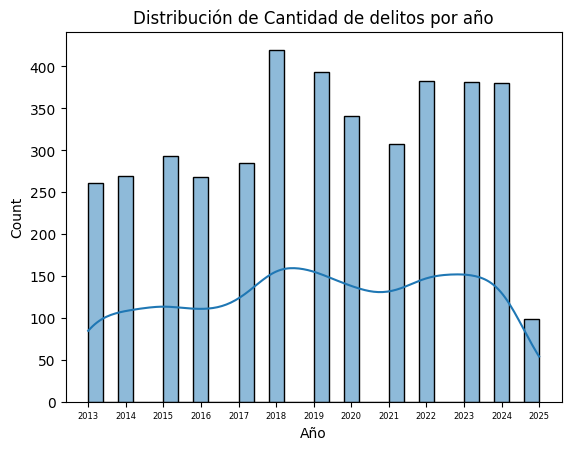

In [54]:
sns.histplot(df['A√ëO'], bins=30, kde=True)
plt.title('Distribuci√≥n de Cantidad de delitos por a√±o')
plt.xlabel('A√±o')
years = sorted(df['A√ëO'].unique())
plt.xticks(years,fontsize=6)
plt.show()

No existe una mejora ni un aumento de la cantidad de delitos de manera significativa en los √∫ltimos a√±os, si se observa un salto muy grande desde 2017 al 2018 que en los a√±os siguientes no disminuye de manera significativa. En 2025 a√∫n hay "pocos" delitos pero asumiendo que faltan 8 meses a√∫n en la base de datos no podemos sacar ninguna conclusi√≥n.

# üîÄ An√°lisis Bivariado
**Delitos divididos por A√±o y genero de la victima**

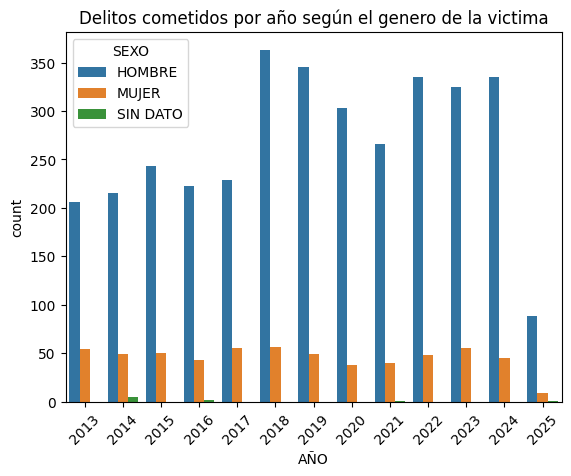

In [56]:
sns.countplot(data=df, x='A√ëO', hue='SEXO')
plt.xticks(rotation=45)
plt.title('Delitos cometidos por a√±o seg√∫n el genero de la victima')
plt.show()

Existen m√°s delitos en los cuales las victimas son hombres; adem√°s, son muy pocos los casos donde no se pudo determinar el sexo de la persona.

**Distribuci√≥n de delitos por horario cometido con Victimas Hombres**

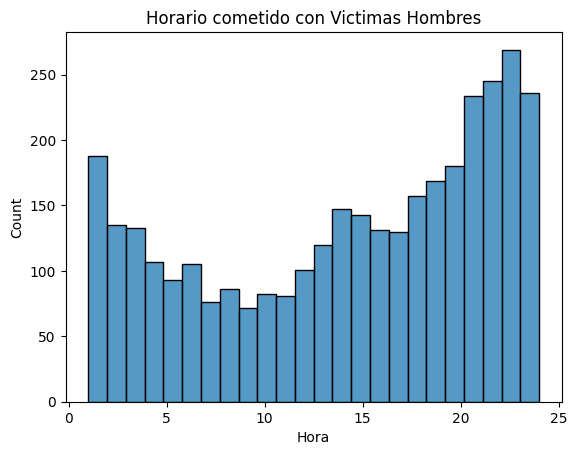

In [57]:
df_distribucion = df[df['SEXO'] == 'HOMBRE'].copy()
df_distribucion['HORA'] = pd.to_numeric(df_distribucion['HORA'], errors='coerce')
df_distribucion = df_distribucion.dropna(subset=['HORA'])
df_distribucion['HORA'] = df_distribucion['HORA'].astype(int)

sns.histplot(data=df_distribucion, x='HORA', bins=24)
plt.title('Horario cometido con Victimas Hombres')
plt.xlabel('Hora')
plt.show()

Existe una mayor cantidad de delitos contra hombres en los horarios nocturnos, principalmente entre las 21 y las 0hs.

**Distribuci√≥n de delitos por horario cometido con Victimas Mujeres**


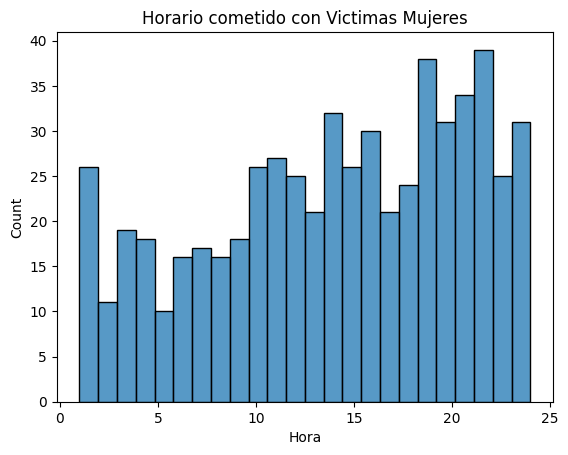

In [58]:
df_distribucion = df[df['SEXO'] == 'MUJER'].copy()
df_distribucion['HORA'] = pd.to_numeric(df_distribucion['HORA'], errors='coerce')
df_distribucion = df_distribucion.dropna(subset=['HORA'])
df_distribucion['HORA'] = df_distribucion['HORA'].astype(int)

sns.histplot(data=df_distribucion, x='HORA', bins=24)
plt.title('Horario cometido con Victimas Mujeres')
plt.xlabel('Hora')
plt.show()

En las mujeres si la ejecuci√≥n de los delitos fue m√°s variada en el rango horario, va en aumento hacia la noche pero tambi√©n existen muchos en otros horarios.
# üîÅ 4. An√°lisis Multivariado
**G√©nero de V√≠ctima vs Arma de fuego utilizada**

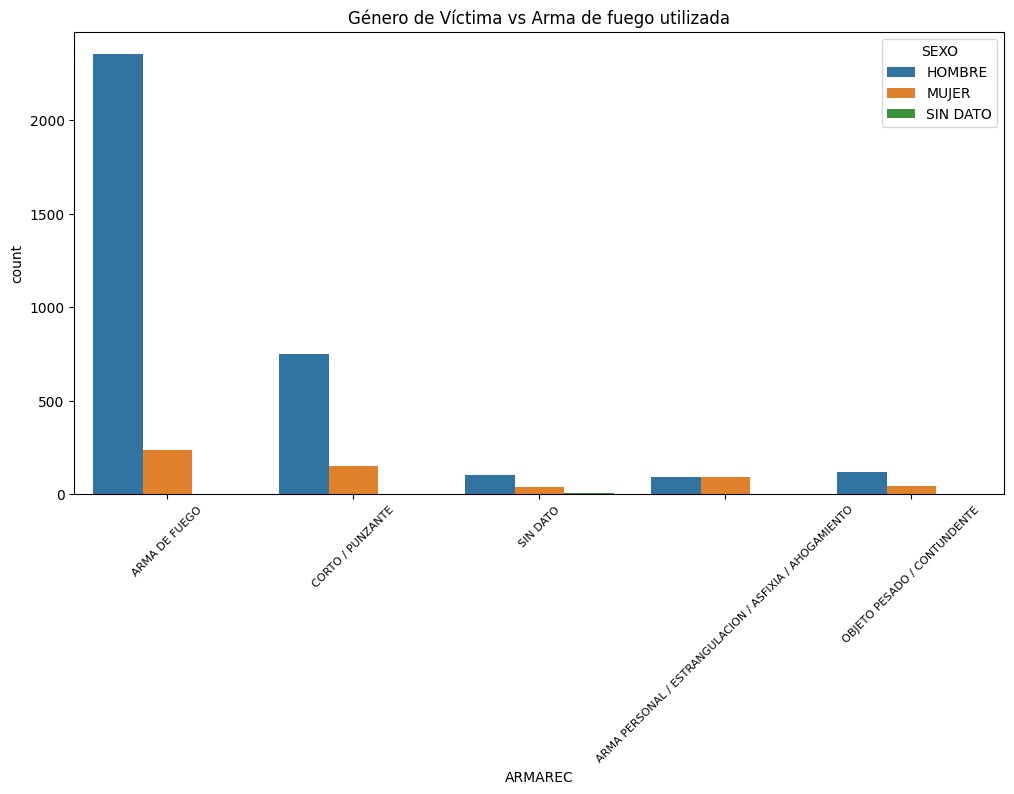

In [59]:
top_countries = df['ARMAREC'].value_counts().head(5).index
df_top = df[df['ARMAREC'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='ARMAREC', hue='SEXO')
plt.xticks(fontsize=8,rotation=45)
plt.title('G√©nero de V√≠ctima vs Arma de fuego utilizada')
plt.show()



El arma m√°s utilizada es la de Fuego para ambos sexos.


# ‚úÖ Conclusiones preliminares

*   Los Departamentos donde m√°s ocurren los delitos son Montevideo y Canelones, siendo Montevideo la capital del pa√≠s.
*   Desde el 2013 a la fecha no ha disminuido la cantidad de delitos, en 2017 creci√≥ significativamente pero no ha disminuido hasta la fecha de una manera relevante.
*   Los hombres son la mayor cantidad de victimas, siendo estos asesinados principalmente entre las 21 y las 0hs. Las mujeres en cambio no tienen una franja de horario fija, los delitos se distribuyen m√°s al correr del d√≠a.
*   El arma de fuego es la herramienta m√°s utilizada en estos delitos.


## 5. Modelado
El objetivo de este modelado es usar variables como Sexo de la victima, la relaci√≥n entre victima y victimario, los antecedentes de la victima para saber si existe una relaci√≥n con la resoluci√≥n del caso.

**Carga de datos**

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Syomara/Data-Science-1/main/Entrega2/homicidios_dolosos_consumados(1).csv', encoding='latin-1')
df.head()

ID_VICTIMA       FECHA   A√ëO    MES          TRIMESTRE DIA_SEMANA HORA  \
0  AAA1134816  30.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE    VIERNES    8   
1  AAA1146478  30.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE    VIERNES   13   
2   AAA128234  28.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE  MIERCOLES   22   
3   AAA199424  28.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE  MIERCOLES   20   
4  AAB1152814  16.04.2021  2021  ABRIL  SEGUNDO TRIMESTRE    VIERNES   18   

  DEPARTAMENTO  JURISDICCION                                  LUGAR  ...  \
0    CANELONES  SECCIONAL 28  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   
1   MONTEVIDEO  SECCIONAL 24  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   
2   MONTEVIDEO  SECCIONAL 14  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   
3   TACUAREMBO   SECCIONAL 2                             RESIDENCIA  ...   
4   MONTEVIDEO  SECCIONAL 15  VIA PUBLICA U OTROS ESPACIOS ABIERTOS  ...   

            ARMAREC             PROCESADOS          MENORESCINICIOPROC  \
0     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   
1     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   
2     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   
3  CORTO / PUNZANTE  AUTOR MAYOR FALLECIDO  SIN MENORES C/INICIO PROC.   
4     ARMA DE FUEGO         SIN PROCESADOS  SIN MENORES C/INICIO PROC.   

      ACLARADO    SEXO EDADCALC NACIONALIDAD  \
0  SIN ACLARAR  HOMBRE       39     URUGUAYA   
1  SIN ACLARAR  HOMBRE       33     URUGUAYA   
2  SIN ACLARAR  HOMBRE       31     URUGUAYA   
3     ACLARADO   MUJER       60     URUGUAYA   
4  SIN ACLARAR  HOMBRE       28     URUGUAYA   

                              ANTECEDENTES ANTECEDENTESPORESTUPEFACIENTES  \
0    ANTECEDENTES POR DELITOS NO VIOLENTOS               SIN ANTECEDENTES   
1  ANTECEDENTES POR AMBOS TIPOS DE DELITOS               SIN ANTECEDENTES   
2       ANTECEDENTES POR DELITOS VIOLENTOS               SIN ANTECEDENTES   
3                         SIN ANTECEDENTES               SIN ANTECEDENTES   
4       ANTECEDENTES POR DELITOS VIOLENTOS               SIN ANTECEDENTES   

        REL_VICT_AGRES  
0  VINCULO DESCONOCIDO  
1  VINCULO DESCONOCIDO  
2  VINCULO DESCONOCIDO  
3     PAREJA/EX PAREJA  
4  VINCULO DESCONOCIDO  

[5 rows x 22 columns]

**Preparaci√≥n de datos**

In [128]:
df['SEXO'] = df['SEXO'].str.upper().str.strip()
df['REL_VICT_AGRES'] = df['REL_VICT_AGRES'].str.upper().str.strip()
df['ANTECEDENTES'] = df['ANTECEDENTES'].str.upper().str.strip()
df['ACLARADO'] = df['ACLARADO'].str.upper().str.strip()

df['ACLARADO_BIN'] = df['ACLARADO'].map({'ACLARADO':1, 'SIN ACLARAR':0})

df.dropna(subset=['ACLARADO_BIN'], inplace=True)

categorical_cols_for_dummies = ['SEXO', 'REL_VICT_AGRES','ANTECEDENTES']
df_model_features = df[categorical_cols_for_dummies]
df_modelo = pd.get_dummies(df_model_features, drop_first=True)

df_modelo['ACLARADO_BIN'] = df['ACLARADO_BIN']

**Dividisi√≥n de datos para entrenamiento y test:**

In [129]:
from sklearn.model_selection import train_test_split

X = df_modelo.drop('ACLARADO_BIN', axis=1)
y = df_modelo['ACLARADO_BIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Entrenamiento del modelo y resultados de evaluaci√≥n**

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[402  94]
 [115 614]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       496
           1       0.87      0.84      0.85       729

    accuracy                           0.83      1225
   macro avg       0.82      0.83      0.82      1225
weighted avg       0.83      0.83      0.83      1225



## 6. Conclusiones finales:
*   De acuerdo a los valores de accurancy el modelo acert√≥ correctamente en el 83% de los casos, generando una buena adherencia del mismo.
*   Se deber√≠a mejorar el modelo para el resto del 17% de los casos.